# Part 1: Data Collection

# Part 1.1: get data from Li, 2008 for readbility measure

In [23]:
# file from https://webuser.bus.umich.edu/feng/fogdata_pre04.zip
# download, unzip and read it into python

In [22]:
# read fog measure and length measure from Li
# ! pip install pyreadstat
import pyreadstat
import pandas as pd
import numpy as np
import os
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)

os.chdir('file path') # need to input file path for the sas data
df, meta = pyreadstat.read_sas7bdat('fogdata_pre04.sas7bdat')


df.drop_duplicates(inplace=True)
print(type(df))
df.dtypes
df.tail(10)
df[df.GVKEY==230796]

<class 'pandas.core.frame.DataFrame'>


,GVKEY,filedate,num_words,fog,flesch,kincaid,fiscdate,gvkey2
56782,230796.0,2003-03-31,22242.0,20.239128,17.158259,16.846108,15705.0,230796
56783,230796.0,2004-03-15,36136.0,21.787154,16.292758,18.267585,16070.0,230796


In [2]:
# check whether the gvkey2 and filedate combination is a unique combination
df.groupby(['gvkey2','filedate']).count()['fog'].sum() == len(df)
# yes
len(df)
df.dtypes

GVKEY        float64
filedate      object
num_words    float64
fog          float64
flesch       float64
kincaid      float64
fiscdate     float64
gvkey2        object
dtype: object

# Part 1.2: get other variables from MCCGR 

In [1]:
from sqlalchemy import create_engine
from sqlalchemy import *
import pandas as pd
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",10000)

s='postgresql://{0}:{1}@{2}:{3}/crsp'.format("username","loginkey","10.101.13.99","5432")
engine = create_engine(s)
connection = engine.connect()
print(engine.table_names())

['sich', 'date4', 'merged_boardex_se', 'cumabr_evt', 'temp', 'sss', 'returns', 'past_returns1', 'past_daycount', 'past_ret', 'abr_returns', 'abr_later_temp', 'abr_later_temp2', 'abr_later1', 'abr_later', 'abr_early_temp', 'abr_early_temp2', 'fundcontrol_roa_acc', 'abr_early1', 'abr_early', 'cum_abr_st', 'cum_abr_2', 'cum_abr_20', 'cum_abr_40', 'reverse_temp1', 'reverse_temp2', 'reverse', 'fundcontrol_croaq', 'co_names_subs_t_c_p', 'co_names_subs_t_c', 'fundcontrol_sic', 'tone_measure', 'tone_measure_temp', 'roaq_accrualq', 'fundcontrol_bmq_mveq', 'rep_earnvol1', 'rep_control4', 'fog_measure_temp', 'word_counts_temp', 'rep_earnvol2', 'rep_earnvol3', 'dup1', 'nodup', 'sue_nanalyst_no_dup', 'fundcontrol_sue_nanalyst', 'rep_earnvol4', 'rep_earnvol5', 'rep_control5', 'rep_ccmlink', 'rep_control6', 'rep_born1', 'rep_born', 'rep_control7', 'future_current_qtr1', 'rep_control8', 'rep_retvol1', 'rep_retvol2', 'rep_retvol3', 'rep_control9', 'uyw', 'wyy_pres', 'wyy1', 'funda_mod', 'soft1', 'fundq

## start from comp.funda and apply industry standard

In [40]:
## industry standard
stmt = '''
Drop table if exists rep_funda;
create table rep_funda as select 
* from (SELECT * FROM comp.funda) "dbplyr_004"
WHERE (("indfmt" = 'INDL' AND "datafmt" = 'STD') AND ("popsrc" = 'D' AND "consol" = 'C'))
AND fyear >= 1987 AND fyear <= 2010;

select * from rep_funda
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt', 'tic', 'cusip', 'conm', 'acctchg', 'acctstd', 'acqmeth', 'adrr', 'ajex', 'ajp', 'bspr', 'compst', 'curcd', 'curncd', 'currtr', 'curuscn', 'final', 'fyr', 'ismod', 'ltcm', 'ogm', 'pddur', 'scf', 'src', 'stalt', 'udpl', 'upd', 'apdedate', 'fdate', 'pdate', 'acchg', 'acco', 'accrt', 'acdo', 'aco', 'acodo', 'acominc', 'acox', 'acoxar', 'acqao', 'acqcshi', 'acqgdwl', 'acqic', 'acqintan', 'acqinvt', 'acqlntal', 'acqniintc', 'acqppe', 'acqsc', 'act', 'adpac', 'aedi', 'afudcc', 'afudci', 'aldo', 'am', 'amc', 'amdc', 'amgw', 'ano', 'ao', 'aocidergl', 'aociother', 'aocipen', 'aocisecgl', 'aodo', 'aol2', 'aoloch', 'aox', 'ap', 'apalch', 'apb', 'apc', 'apofs', 'aqa', 'aqc', 'aqd', 'aqeps', 'aqi', 'aqp', 'aqpl1', 'aqs', 'arb', 'arc', 'arce', 'arced', 'arceeps', 'artfs', 'at', 'aul3', 'autxr', 'balr', 'banlr', 'bast', 'bastr', 'batr', 'bcef', 'bclr', 'bcltbl', 'bcnlr', 'bcrbl', 'bct', 'bctbl', 'bctr', 'billexce', 'bkvlps', 'bltb

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchg,acctstd,acqmeth,adrr,ajex,ajp,bspr,compst,curcd,curncd,currtr,curuscn,final,fyr,ismod,ltcm,ogm,pddur,scf,src,stalt,udpl,upd,apdedate,fdate,pdate,acchg,acco,accrt,acdo,aco,acodo,acominc,acox,acoxar,acqao,acqcshi,acqgdwl,acqic,acqintan,acqinvt,acqlntal,acqniintc,acqppe,acqsc,act,adpac,aedi,afudcc,afudci,aldo,am,amc,amdc,amgw,ano,ao,aocidergl,aociother,aocipen,aocisecgl,aodo,aol2,aoloch,aox,ap,apalch,apb,apc,apofs,aqa,aqc,aqd,aqeps,aqi,aqp,aqpl1,aqs,arb,arc,arce,arced,arceeps,artfs,at,aul3,autxr,balr,banlr,bast,bastr,batr,bcef,bclr,bcltbl,bcnlr,bcrbl,bct,bctbl,bctr,billexce,bkvlps,bltbl,ca,capr1,capr2,capr3,caps,capsft,capx,capxv,cb,cbi,cdpac,cdvc,ceiexbill,ceq,ceql,ceqt,cfbd,cfere,cfo,cfpdo,cga,cgri,cgti,cgui,ch,che,chech,chs,ci,cibegni,cicurr,cidergl,cimii,ciother,cipen,cisecgl,citotal,cld2,cld3,cld4,cld5,clfc,clfx,clg,clis,cll,cllc,clo,clrll,clt,cmp,cnltbl,cogs,cpcbl,cpdoi,cpnli,cppbl,cprei,crv,crvnli,cshfd,cshi,csho,cshpri,cshr,cshrc,cshrp,cshrso,cshrt,cshrw,cstk,cstkcv,cstke,dbi,dc,dclo,dcom,dcpstk,dcs,dcvsr,dcvsub,dcvt,dd,dd1,dd2,dd3,dd4,dd5,depc,derac,deralt,derhedgl,derlc,derllt,dfpac,dfs,dfxa,diladj,dilavx,dlc,dlcch,dltis,dlto,dltp,dltr,dltsub,dltt,dm,dn,do,donr,dp,dpacb,dpacc,dpacli,dpacls,dpacme,dpacnr,dpaco,dpacre,dpact,dpc,dpdc,dpltb,dpret,dpsc,dpstb,dptb,dptc,dptic,dpvieb,dpvio,dpvir,drc,drci,drlt,ds,dt,dtea,dted,dteeps,dtep,dudd,dv,dvc,dvdnp,dvintf,dvp,dvpa,dvpd,dvpdp,dvpibb,dvrpiv,dvrre,dvsco,dvt,dxd2,dxd3,dxd4,dxd5,ea,ebit,ebitda,eiea,emol,emp,epsfi,epsfx,epspi,epspx,esopct,esopdlt,esopnr,esopr,esopt,esub,esubc,excadj,exre,fatb,fatc,fatd,fate,fatl,fatn,fato,fatp,fca,fdfr,fea,fel,ffo,ffs,fiao,finaco,finao,fincf,finch,findlc,findlt,finivst,finlco,finlto,finnp,finrecc,finreclt,finrev,finxint,finxopr,fopo,fopox,fopt,fsrco,fsrct,fuseo,fuset,gbbl,gdwl,gdwlam,gdwlia,gdwlid,gdwlieps,gdwlip,geqrv,gla,glcea,glced,glceeps,glcep,gld,gleps,gliv,glp,govgr,govtown,gp,gphbl,gplbl,gpobl,gprbl,gptbl,gwo,hedgegl,iaeq,iaeqci,iaeqmi,iafici,iafxi,iafxmi,iali,ialoi,ialti,iamli,iaoi,iapli,iarei,iasci,iasmi,iassi,iasti,iatci,iati,iatmi,iaui,ib,ibadj,ibbl,ibc,ibcom,ibki,ibmii,icapt,idiis,idilb,idilc,idis,idist,idit,idits,iire,initb,intan,intano,intc,intpn,invch,invfg,invo,invofs,invreh,invrei,invres,invrm,invt,invwip,iobd,ioi,iore,ip,ipabl,ipc,iphbl,iplbl,ipobl,iptbl,ipti,ipv,irei,irent,irii,irli,irnli,irsi,iseq,iseqc,iseqm,isfi,isfxc,isfxm,isgr,isgt,isgu,islg,islgc,islgm,islt,isng,isngc,isngm,isotc,isoth,isotm,issc,issm,issu,ist,istc,istm,isut,itcb,itcc,itci,ivaco,ivaeq,ivao,ivch,ivgod,ivi,ivncf,ivpt,ivst,ivstch,lcabg,lcacl,lcacr,lcag,lcal,lcalt,lcam,lcao,lcast,lcat,lco,lcox,lcoxar,lcoxdr,lct,lcuacu,li,lif,lifr,lifrp,lloml,lloo,llot,llrci,llrcr,llwoci,llwocr,lno,lo,lol2,loxdr,lqpl1,lrv,ls,lse,lst,lt,lul3,mib,mibn,mibt,mii,mrc1,mrc2,mrc3,mrc4,mrc5,mrct,mrcta,msa,msvrv,mtl,nat,nco,nfsr,ni,niadj,nieci,niint,niintpfc,niintpfp,niit,nim,nio,nipfc,nipfp,nit,nits,nopi,nopio,np,npanl,npaore,nparl,npat,nrtxt,nrtxtd,nrtxteps,oancf,ob,oiadp,oibdp,opeps,opili,opincar,opini,opioi,opiri,opiti,oprepsx,optca,optdr,optex,optexd,optfvgr,optgr,optlife,optosby,optosey,optprcby,optprcca,optprcex,optprcey,optprcgr,optprcwa,optrfr,optvol,palr,panlr,patr,pcl,pclr,pcnlr,pctr,pdvc,pi,pidom,pifo,pll,pltbl,pnca,pncad,pncaeps,pncia,pncid,pncieps,pncip,pncwia,pncwid,pncwieps,pncwip,pnlbl,pnli,pnrsho,pobl,ppcbl,ppegt,ppenb,ppenc,ppenli,ppenls,ppenme,ppennr,ppeno,ppent,ppevbb,ppeveb,ppevo,ppevr,pppabl,ppphbl,pppobl,ppptbl,prc,prca,prcad,prcaeps,prebl,pri,prodv,prsho,prstkc,prstkcc,prstkpc,prvt,pstk,pstkc,pstkl,pstkn,pstkr,pstkrv,ptbl,ptran,pvcl,pvo,pvon,pvpl,pvt,pwoi,radp,ragr,rari,rati,rca,rcd,rceps,rcl,rcp,rdip,rdipa,rdipd,rdipeps,rdp,re,rea,reajo,recch,recco,recd,rect,recta,rectr,recub,ret,reuna,reunr,revt,ris,rll,rlo,rlp,rlri,rlt,rmum,rpag,rra,rrd,rreps,rrp,rstche,rstchelt,rvbci,rvbpi,rvbti,rvdo,rvdt,rveqt,rvlrv,rvno,rvnt,rvri,rvsi,rvti,rvtxr,rvupi,rvutx,saa,sal,sale,salepfc,salepfp,sbdc,sc,sc

In [41]:
## s description of the rep_funda table
stmt = '''
drop table if exists rep_funda_des;
create table rep_funda_des as
select column_name, data_type 
from information_schema.columns 
where table_name = 'rep_funda';
select *  from rep_funda_des;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['column_name', 'data_type']


,column_name,data_type
0,gvkey,text
1,datadate,date
2,fyear,bigint
3,indfmt,text
4,consol,text


In [42]:
# count the number
stmt = '''
select count(*) from rep_funda
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['count']


,count
0,265938


## Control Var: 

##### 1. SIZE, MTB. AGE. SI. ACC, NITEMS,  SICH AS SIC
##### 2. AQC(replace M&A), SSTK(replace SEO), The above is what the author used. I use the following as an approximation
1. SEO is a dummy that equals 1 if a firm has seasoned equity offering in this year according to SDC Global New Issues database and 0 otherwise.
2. MA is a dummy that equals 1 if a firm appears as an acquirer in this year in SDC Platinum M&A database and 0 otherwise.
3. SEO when the Sale of Common and Pref. Stock (SSTK) is greater than 10 percent of beginning total assets, and is 0 otherwise;
4. M&A if the amount of acquisition (AQC) is greater than 10 percent of beginning total assets, and is 0 otherwise;
##### 3. AT_LEAD1,  AT_LEAD2,  AT_LAG1, EARN_LEAD1,
##### 4. EARN_LEAD2,EARN_LAG1, 
##### 5. OIADP_LEAD1,OIADP_LEAD2,OIADP_LAG1

In [46]:
stmt = '''
/*****************count nitems*******************/
CREATE OR REPLACE FUNCTION f_count_notnull_in_row(ANYELEMENT)
  RETURNS int LANGUAGE sql IMMUTABLE AS
'SELECT count(value)::int
 FROM   json_each_text(row_to_json($1))';

DROP TABLE IF EXISTS rep_funda_temp;
create TABLE rep_funda_temp
as SELECT *, f_count_notnull_in_row(t) as nitems
FROM rep_funda t;


/*****************get data*******************/
Drop table if exists rep_control0;
create table rep_control0 as select 
    datadate, fyear, gvkey, 
    (case when at > 0 then oiadp/at else null end) as earn,
    (case when at > 0 then spi/at else null end) as si,
    (case when at > 0 then (oiadp-oancf)/at else null end) as acc,
    sstk as seo, 
    aqc as ma, 
    (case when prcc_f>0 and csho>0 then log(prcc_f*csho) else null end) as size,  
    (case when at > 0 then (prcc_f*csho+lt)/at else null end) as mtb,
    (case when dvc>1 then 1 else 0 end) as div,
    nitems, sich as sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc
from rep_funda_temp;

Drop table if exists rep_control1;
create table rep_control1 as select *, 
lag(fyear, 1) over (partition by gvkey order by fyear) as fyear_lag1,
lag(at, 1) over (partition by gvkey order by fyear) as at_lag1,
lag(earn, 1) over (partition by gvkey order by fyear) as earn_lag1,
lag(oiadp, 1) over (partition by gvkey order by fyear) as oiadp_lag1,

lag(fyear, -1) over (partition by gvkey order by fyear) as fyear_lead1,
lag(at, -1) over (partition by gvkey order by fyear) as at_lead1,
lag(earn, -1) over (partition by gvkey order by fyear) as earn_lead1,
lag(oiadp, -1) over (partition by gvkey order by fyear) as oiadp_lead1,

lag(fyear, -2) over (partition by gvkey order by fyear) as fyear_lead2,
lag(at, -2) over (partition by gvkey order by fyear) as at_lead2,
lag(earn, -2) over (partition by gvkey order by fyear) as earn_lead2,
lag(oiadp, -2) over (partition by gvkey order by fyear) as oiadp_lead2

from rep_control0;

update rep_control1 set at_lag1=NULL     where fyear_lag1 <> fyear - 1;
update rep_control1 set earn_lag1=NULL   where fyear_lag1 <> fyear - 1;
update rep_control1 set oiadp_lag1=NULL  where fyear_lag1 <> fyear - 1;

update rep_control1 set at_lead1=NULL    where fyear_lead1 <> fyear + 1;
update rep_control1 set earn_lead1=NULL    where fyear_lead1 <> fyear + 1;
update rep_control1 set oiadp_lead1=NULL    where fyear_lead1 <> fyear + 1;

update rep_control1 set at_lead2=NULL    where fyear_lead2 <> fyear + 2;
update rep_control1 set earn_lead2=NULL    where fyear_lead2 <> fyear + 2;
update rep_control1 set oiadp_lead2=NULL    where fyear_lead2 <> fyear + 2;

update rep_control1 set ma = (case when ma > 0.1*at_lag1 then 1 else 0 end);
update rep_control1 set seo = (case when seo > 0.1*at_lag1 then 1 else 0 end);

select * from rep_control1
limit 20;
'''

result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['datadate', 'fyear', 'gvkey', 'earn', 'si', 'acc', 'seo', 'ma', 'size', 'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho', 'prcc_f', 'lt', 'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'fyear_lag1', 'at_lag1', 'earn_lag1', 'oiadp_lag1', 'fyear_lead1', 'at_lead1', 'earn_lead1', 'oiadp_lead1', 'fyear_lead2', 'at_lead2', 'earn_lead2', 'oiadp_lead2']


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2
0,2011-04-30,2010,003363,None,None,None,0.0,0.0,None,None,0,26,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
1,1987-06-30,1987,006628,None,None,None,0.0,0.0,None,None,0,38,NaN,NaN,None,NaN,91.500,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2,1991-12-31,1991,012064,None,None,None,0.0,0.0,None,None,0,40,6311.0,NaN,None,NaN,0.156,NaN,None,None,None,None,None,1990.0,9675.16,0.005862,56.717,NaN,NaN,NaN,NaN,NaN,None,None,None
3,1987-09-30,1987,014109,None,None,None,0.0,0.0,None,None,0,138,2860.0,1166.767,None,14.214,NaN,1061.572,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
4,1987-12-31,1987,014475,None,None,None,0.0,0.0,None,None,0,30,5063.0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [47]:
stmt ='''
SELECT count(*) from rep_control1 
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['count']


,count
0,265938


## control DLW, SIC_COMP
1. sic_comp is from comp.company
2. I suggest using sich as it reflects the period-specific industry better

In [54]:
stmt = '''

drop table if exists rep_dlw;
create table rep_dlw as 
select distinct GVKEY, (CASE WHEN incorp = 'DE' THEN 1 ELSE 0 END) AS DLW, SIC as sic_comp
from comp.company
where loc='USA';


/****checked that rep_dlw is unique on gvkey  *****/
select gvkey from rep_dlw
group by gvkey
having count(*) > 1
limit 20;
'''

result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

gvkey


,gvkey


In [56]:
stmt='''
drop table if exists rep_control2;
create table rep_control2 as 
select l.*, r.dlw, r.sic_comp
from rep_control1 as l
left join rep_dlw as r
on l.gvkey = r.gvkey;

select * from rep_control2 
limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

datadate, fyear, gvkey, earn, si, acc, seo, ma, size, mtb, div, nitems, sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc, fyear_lag1, at_lag1, earn_lag1, oiadp_lag1, fyear_lead1, at_lead1, earn_lead1, oiadp_lead1, fyear_lead2, at_lead2, earn_lead2, oiadp_lead2, dlw, sic_comp


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2,dlw,sic_comp
0,1990-09-30,1990,030557,None,None,None,0.0,0.0,None,None,0,25,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1991.0,None,None,None,1992.0,None,None,None,1.0,3320
1,1991-01-31,1990,031215,None,None,None,0.0,0.0,None,None,0,25,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1991.0,None,None,None,1992.0,None,None,None,1.0,5734
2,1990-12-31,1990,031454,None,None,None,0.0,0.0,None,None,0,25,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1991.0,None,None,None,1992.0,None,None,None,1.0,4991
3,1991-12-31,1991,031745,None,None,None,0.0,0.0,None,None,0,25,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1992.0,None,None,None,1993.0,None,None,None,1.0,4812
4,1992-03-31,1991,060899,None,None,None,0.0,0.0,None,None,0,25,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1992.0,None,None,None,1993.0,None,None,None,0.0,3679


In [59]:
stmt='''
select count(*) from rep_control2
limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

count


,count
0,265938


## Control: NBSEG, NGSEG

In [60]:
# DATADATE refers to the period in which the financial activity occurred
# SRCDATE(source date) refers to the reporting period of the data.
# In the case of segments data, companies typically report (e.g. in shareholders' reports)
# the most recent 3 years. This explains why segments data for a given DATADATE is likely to be reported 3 times, in 3 successive years.
# For example, if a company re-organizes its segments in fiscal year I, it retroactively
# reports years I-1 and I-2 using the new segments definitions, allowing shareholders to better understand recent performance using the new scheme.
# Segments data would also change if a company issues a restated 10-K within two years.
# Using only one SRCDATE for each DATADATE of interest is suggested to avoid double- or triple-counting.
                                                      
stmt = '''
drop table if exists rep_segdate;
create table rep_segdate as select
gvkey, stype, datadate, max(srcdate) as maxdate
FROM comp.wrds_segmerged
group by gvkey, stype, datadate;

drop table if exists rep_seg1;
create table rep_seg1 as select
l.* from comp.wrds_segmerged as l
inner join rep_segdate as r
on l.gvkey = r.gvkey and l.datadate=r.datadate and l.stype=r.stype and l.srcdate = r.maxdate;

drop table if exists rep_seg2;
create table rep_seg2 as select
gvkey, datadate, srcdate, stype, count(*) as segnum
from rep_seg1
group by gvkey, stype, datadate, srcdate;

drop table if exists rep_seg;
create table rep_seg as select distinct
gvkey, datadate,
      max(case when stype= 'GEOSEG' then segnum End) as NGSEG, 
      max(case when stype= 'BUSSEG' then segnum End) as NBSEG
from rep_seg2 
group by gvkey, datadate
order by gvkey, datadate;

select * from rep_seg
where gvkey = '001004'
order by datadate
limit 20;

select min(datadate) from comp.wrds_segmerged
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

min


,min
0,2012-06-30


In [61]:
stmt='''
drop table if exists rep_control3;
create table rep_control3 as 
select l.*, r.ngseg, r.nbseg, r.datadate as rd
from rep_control2 as l
left join rep_seg as r
on l.gvkey = r.gvkey and extract(year from l.datadate) = extract(year from r.datadate);

select count(*) from rep_control3 
limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

count


,count
0,265938


## EARN_VOL:standard deviation in the operating earnings in the past five years

In [62]:
# create a unique id for each observations
stmt='''
drop table if exists rep_earnvol1;
create table rep_earnvol1 as
select row_number() over() as myid, * from rep_control3;

drop table if exists rep_control4;
create table rep_control4 as 
select * from rep_earnvol1;

drop table if exists rep_earnvol2;
create table rep_earnvol2 as
select myid, gvkey, datadate, fyear, earn 
from rep_earnvol1;

drop table if exists rep_earnvol3;
create table rep_earnvol3 as
select *, generate_series(fyear - 4, fyear)  as past_fyear 
from rep_earnvol2;

drop table if exists rep_earnvol4;
create table rep_earnvol4 as
select l.*, r.earn as past_earn
from rep_earnvol3 as l
inner join 
    (select a.gvkey, a.fyear, max(a.earn) as earn from
        (select gvkey, fyear, earn
        from rep_control4) as a
    group by a.gvkey, a.fyear
    ) as r
on l.past_fyear = r.fyear and l.gvkey = r.gvkey
order by myid;

drop table if exists rep_earnvol5;
create table rep_earnvol5 as
select myid, count(*) as count_years, stddev_samp(past_earn) as earn_vol
from rep_earnvol4
group by (myid);

drop table if exists rep_control5;
create table rep_control5 as 
select l.*, r.count_years, r.earn_vol
from rep_control4 as l
left join rep_earnvol5 as r
on l.myid=r.myid;

alter table rep_control5 drop column myid;

select * from rep_control5
limit 10;
'''

result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head(2)

datadate, fyear, gvkey, earn, si, acc, seo, ma, size, mtb, div, nitems, sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc, fyear_lag1, at_lag1, earn_lag1, oiadp_lag1, fyear_lead1, at_lead1, earn_lead1, oiadp_lead1, fyear_lead2, at_lead2, earn_lead2, oiadp_lead2, dlw, sic_comp, ngseg, nbseg, rd, count_years, earn_vol


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2,dlw,sic_comp,ngseg,nbseg,rd,count_years,earn_vol
0,2001-05-31,2000,001004,0.065241,-0.007694,-0.000432,0.0,0.0,2.576477,1.052584,1,287,5080,701.854,45.790,26.937,14.00,361.642,-5.4,46.093,9.157,NaN,3.200,1999,740.998,0.095355,70.658,2001,710.199,0.006633,4.711,2002.0,686.621,0.005204,3.573,1,5080,None,None,None,5,0.016058
1,2002-05-31,2001,001004,0.006633,-0.121093,0.053543,0.0,0.0,2.561808,1.076539,1,314,5080,710.199,4.711,31.870,11.44,399.964,-86.0,-33.315,4.430,34.334,13.251,2000,701.854,0.065241,45.790,2002,686.621,0.005204,3.573,2003.0,709.292,0.029341,20.811,1,5080,None,None,None,5,0.040723


In [63]:
stmt = '''
select count(*) from rep_control5
limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head(10)

count


,count
0,265938


## link crsp with compustat

In [64]:
stmt = '''
Drop table if exists rep_ccmlink;
CREATE TABLE rep_ccmlink AS
SELECT * FROM crsp.ccmxpf_linktable
WHERE (linkprim = 'C' or linkprim = 'P') AND usedflag = 1
AND linktype in ('LC', 'LU');

drop table if exists rep_control6;
create table rep_control6 as
select l.*, r.lpermco as permco, r.lpermno as permno
from rep_control5 as l
inner join rep_ccmlink as r
ON l.gvkey = r.gvkey 
WHERE (l.datadate BETWEEN r.linkdt AND r.linkenddt)
OR ((l.datadate > linkdt) AND ((r.linkenddt) IS NULL));

select * from rep_control6
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head()

['datadate', 'fyear', 'gvkey', 'earn', 'si', 'acc', 'seo', 'ma', 'size', 'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho', 'prcc_f', 'lt', 'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'fyear_lag1', 'at_lag1', 'earn_lag1', 'oiadp_lag1', 'fyear_lead1', 'at_lead1', 'earn_lead1', 'oiadp_lead1', 'fyear_lead2', 'at_lead2', 'earn_lead2', 'oiadp_lead2', 'dlw', 'sic_comp', 'ngseg', 'nbseg', 'rd', 'count_years', 'earn_vol', 'permco', 'permno']


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2,dlw,sic_comp,ngseg,nbseg,rd,count_years,earn_vol,permco,permno
0,1989-01-31,1988,001003,-0.268550,-0.214988,-0.139558,0.0,0.0,0.671659,1.300322,0,226,5712,16.280,-4.372,2.683,1.75,16.474,-3.500,-2.100,0.000,0.0,0.0,1987.0,16.042,-0.025246,-0.405,1989.0,10.109,-0.229696,-2.322,NaN,NaN,NaN,NaN,1,5712,None,None,None,2,0.172042,6672,10031
1,1988-01-31,1987,001003,-0.025246,0.000000,0.036280,0.0,0.0,0.867953,0.983496,0,232,5712,16.042,-0.405,2.683,2.75,8.399,0.000,-0.987,0.000,0.0,0.0,NaN,NaN,NaN,NaN,1988.0,16.280,-0.268550,-4.372,1989.0,10.109,-0.229696,-2.322,1,5712,None,None,None,1,NaN,6672,10031
2,2003-05-31,2002,001004,0.005204,-0.007806,-0.045382,0.0,0.0,2.156336,0.779123,0,309,5080,686.621,3.573,31.851,4.50,391.633,-5.360,34.733,0.797,0.0,0.0,2001.0,710.199,0.006633,4.711,2003.0,709.292,0.029341,20.811,2004.0,732.230,0.046193,33.824,1,5080,None,None,None,5,0.047961,20000,54594
3,2004-05-31,2003,001004,0.029341,-0.002866,0.008796,0.0,0.0,2.489828,1.010184,0,324,5080,709.292,20.811,32.245,9.58,407.608,-2.033,14.572,0.000,0.0,0.0,2002.0,686.621,0.005204,3.573,2004.0,732.230,0.046193,33.824,2005.0,978.819,0.064011,62.655,1,5080,None,None,None,5,0.039174,20000,54594
4,2001-05-31,2000,001004,0.065241,-0.007694,-0.000432,0.0,0.0,2.576477,1.052584,1,287,5080,701.854,45.790,26.937,14.00,361.642,-5.400,46.093,9.157,NaN,3.2,1999.0,740.998,0.095355,70.658,2001.0,710.199,0.006633,4.711,2002.0,686.621,0.005204,3.573,1,5080,None,None,None,5,0.016058,20000,54594


In [78]:
# only linked are considered in analysis
# two gvkey can link to one permno: parent company
stmt ='''SELECT permno, fyear from rep_control6 
group by permno, fyear
having count(*) > 1
limit 20;
select * from rep_control6
where permno=67563 and fyear = 1998
limit 10
'''
stmt ='''SELECT count(*) from rep_control6 
limit 20;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(result_proxy.keys())
pd.DataFrame(results,columns = result_proxy.keys()).head(20)

['count']


,count
0,166358


## Control Age

In [79]:
# born date for each permno (securities)
stmt='''
drop table if exists rep_born1;
create table rep_born1 as
select date, permno, row_number() over (partition by permno order by date) as n
from crsp.msf
where ret is not null;

drop table if exists rep_born;
create table rep_born as
select date as born, permno from rep_born1
where n=1;

select  * from rep_born limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head(10)

born, permno


,born,permno
0,1986-02-28,10000
1,1986-02-28,10001
2,1986-02-28,10002
3,1986-02-28,10003
4,1986-02-28,10005
5,1926-01-30,10006
6,1986-02-28,10007
7,1986-02-28,10008
8,1986-02-28,10009
9,1986-02-28,10010


In [80]:
# get age information for each observation
# as we need the end date to subtract the born date to measure age in years
# make sure left join is used
stmt='''
drop table if exists rep_control7;
create table rep_control7 as 
select l.*, cast(l.datadate - r.born as float)/365 as age
from rep_control6 as l
left join rep_born as r
on l.permno = r.permno;
select  * from rep_control7 limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

datadate, fyear, gvkey, earn, si, acc, seo, ma, size, mtb, div, nitems, sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc, fyear_lag1, at_lag1, earn_lag1, oiadp_lag1, fyear_lead1, at_lead1, earn_lead1, oiadp_lead1, fyear_lead2, at_lead2, earn_lead2, oiadp_lead2, dlw, sic_comp, ngseg, nbseg, rd, count_years, earn_vol, permco, permno, age


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2,dlw,sic_comp,ngseg,nbseg,rd,count_years,earn_vol,permco,permno,age
0,1993-02-28,1992,014453,0.077879,0.000000,0.013283,0.0,1.0,1.325762,2.645313,0,281,8734,9.335,0.727,5.293,4.000,3.522,0.000,0.603,0.0,0.038,0.750,1991.0,6.991,-0.037477,-0.262,1993.0,14.157,0.227944,3.227,1994.0,25.009,0.224919,5.625,1,8711,None,None,None,5,0.112898,9813,10011,4.589041
1,1992-02-29,1991,014453,-0.037477,-0.018309,-0.028894,0.0,0.0,1.230618,2.704281,0,281,8734,6.991,-0.262,5.039,3.375,1.899,-0.128,-0.060,0.0,-0.007,0.335,1990.0,7.881,0.054435,0.429,1992.0,9.335,0.077879,0.727,1993.0,14.157,0.227944,3.227,1,8711,None,None,None,5,0.195815,9813,10011,3.589041
2,1991-02-28,1990,014453,0.054435,0.000000,0.032737,1.0,0.0,1.439159,3.809923,0,279,8734,7.881,0.429,4.998,5.500,2.537,0.000,0.171,0.0,1.455,0.000,1989.0,5.962,-0.101979,-0.608,1991.0,6.991,-0.037477,-0.262,1992.0,9.335,0.077879,0.727,1,8711,None,None,None,4,0.208207,9813,10011,2.586301
3,1990-02-28,1989,014453,-0.101979,0.000000,-0.102147,0.0,0.0,1.290118,3.656449,0,285,8734,5.962,-0.608,4.458,4.375,2.296,0.000,0.001,0.0,0.000,0.000,1988.0,5.468,0.192392,1.052,1990.0,7.881,0.054435,0.429,1991.0,6.991,-0.037477,-0.262,1,8711,None,None,None,3,0.246744,9813,10011,1.586301
4,1989-02-28,1988,014453,0.192392,0.000000,0.153255,1.0,0.0,1.126261,2.724945,0,282,8734,5.468,1.052,4.458,3.000,1.526,0.000,0.214,0.0,2.861,0.000,1987.0,1.324,0.388218,0.514,1989.0,5.962,-0.101979,-0.608,1990.0,7.881,0.054435,0.429,1,8711,None,None,None,2,0.138469,9813,10011,0.586301


In [81]:
stmt='''
select count(*) from rep_control7 limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head()

count


,count
0,166358


## Control RET_VOL: standard deviation of monthly returns in the past year

In [82]:
stmt='''
drop table if exists rep_control8;

create table rep_control8 as select *, row_number() over() as myid
from rep_control7;

drop table if exists rep_retvol1;
create table rep_retvol1 as
select myid, permno, datadate,
generate_series(datadate - interval '11 month', datadate, interval '1 month') as past_date
from rep_control8
order by myid;

drop table if exists rep_retvol2;
create table  rep_retvol2 as
select l.*, r.ret, r.date from rep_retvol1 as l
inner join crsp.msf as r
on extract(year from l.past_date) = extract(year from r.date)
and extract(month from l.past_date) = extract(month from r.date)
and l.permno=r.permno
order by myid, date
;

drop table if exists rep_retvol3;
create table rep_retvol3 as
select myid, count(*) as count_months, stddev_samp(ret) as ret_vol
from rep_retvol2
group by (myid);

drop table if exists rep_control9;
create table rep_control9 as 
select l.*, r.count_months, r.ret_vol
from rep_control8 as l
left join rep_retvol3 as r
on l.myid=r.myid;

alter table rep_control9 drop column myid;
select * from rep_control9
limit 10;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head(2)

datadate, fyear, gvkey, earn, si, acc, seo, ma, size, mtb, div, nitems, sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc, fyear_lag1, at_lag1, earn_lag1, oiadp_lag1, fyear_lead1, at_lead1, earn_lead1, oiadp_lead1, fyear_lead2, at_lead2, earn_lead2, oiadp_lead2, dlw, sic_comp, ngseg, nbseg, rd, count_years, earn_vol, permco, permno, age, count_months, ret_vol


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,fyear_lag1,at_lag1,earn_lag1,oiadp_lag1,fyear_lead1,at_lead1,earn_lead1,oiadp_lead1,fyear_lead2,at_lead2,earn_lead2,oiadp_lead2,dlw,sic_comp,ngseg,nbseg,rd,count_years,earn_vol,permco,permno,age,count_months,ret_vol
0,1993-02-28,1992,014453,0.077879,0.000000,0.013283,0.0,1.0,1.325762,2.645313,0,281,8734,9.335,0.727,5.293,4.000,3.522,0.000,0.603,0.0,0.038,0.750,1991.0,6.991,-0.037477,-0.262,1993.0,14.157,0.227944,3.227,1994.0,25.009,0.224919,5.625,1,8711,None,None,None,5,0.112898,9813,10011,4.589041,12,0.311713
1,1992-02-29,1991,014453,-0.037477,-0.018309,-0.028894,0.0,0.0,1.230618,2.704281,0,281,8734,6.991,-0.262,5.039,3.375,1.899,-0.128,-0.060,0.0,-0.007,0.335,1990.0,7.881,0.054435,0.429,1992.0,9.335,0.077879,0.727,1993.0,14.157,0.227944,3.227,1,8711,None,None,None,5,0.195815,9813,10011,3.589041,12,0.139280


In [83]:
stmt='''
select count(*) from rep_control9 limit 5;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).head(2)

count


,count
0,166358


## collect control data from MCCGR

In [84]:
import os
os.chdir('D:\\OneDrive - The University of Melbourne\\PhD\\工具、技术、数据、项目\\数据\\fog measure in 10k LI 2008')
stmt='''
select * from rep_control9;
'''
result_proxy = connection.execute(stmt)
results = result_proxy.fetchall()
print(", ".join(result_proxy.keys()))
pd.DataFrame(results,columns = result_proxy.keys()).to_csv("control_5.csv",encoding='utf-8')
print('done!')

datadate, fyear, gvkey, earn, si, acc, seo, ma, size, mtb, div, nitems, sic, at, oiadp, csho, prcc_f, lt, spi, oancf, dvc, sstk, aqc, fyear_lag1, at_lag1, earn_lag1, oiadp_lag1, fyear_lead1, at_lead1, earn_lead1, oiadp_lead1, fyear_lead2, at_lead2, earn_lead2, oiadp_lead2, dlw, sic_comp, ngseg, nbseg, rd, count_years, earn_vol, permco, permno, age, count_months, ret_vol
done!


# Part 1.3 segmentation information only starts from 2012 in MCCGR, I need to collect from wrds instead

In [ ]:
import wrds
conn = wrds.Connection() 

In [73]:
conn.list_libraries().sort()
# conn.list_libraries()
# conn.list_tables(library='compseg')

In [144]:
# DATADATE refers to the period in which the financial activity occurred
# SRCDATE(source date) refers to the reporting period of the data.
# In the case of segments data, companies typically report (e.g. in shareholders' reports)
# the most recent 3 years. This explains why segments data for a given DATADATE is likely to be reported 3 times, in 3 successive years.
# For example, if a company re-organizes its segments in fiscal year I, it retroactively
# reports years I-1 and I-2 using the new segments definitions, allowing shareholders to better understand recent performance using the new scheme.
# Segments data would also change if a company issues a restated 10-K within two years.
# Using only one SRCDATE for each DATADATE of interest is suggested to avoid double- or triple-counting.
   
stmt ='''                                                   

select * from (select distinct
gvkey, datadate,
      max(case when stype= 'GEOSEG' then segnum End) as NGSEG, 
      max(case when stype= 'BUSSEG' then segnum End) as NBSEG
        from (select gvkey, datadate, srcdate, stype, count(*) as segnum
            from  (select
            l.* from comp.wrds_segmerged as l
            inner join (select
            gvkey, stype, datadate, max(srcdate) as maxdate
            FROM comp.wrds_segmerged
            group by gvkey, stype, datadate) as r
            on l.gvkey = r.gvkey and l.datadate=r.datadate and l.stype=r.stype and l.srcdate = r.maxdate) as c
            group by gvkey, stype, datadate, srcdate) as b
    group by gvkey, datadate
    order by gvkey, datadate) as a;
'''
# stmt = '''SELECT min(datadate) FROM compseg.wrds_segmerged
# LIMIT 10
# '''
result_proxy = conn.raw_sql(stmt)
type(result_proxy)
result_proxy

,gvkey,datadate,ngseg,nbseg
0,001000,1976-12-31,NaN,3.0
1,001000,1977-12-31,NaN,3.0
2,001001,1983-12-31,2.0,1.0
3,001001,1984-12-31,2.0,1.0
4,001001,1985-12-31,2.0,1.0
...,...,...,...,...
313553,330227,2019-12-31,NaN,1.0
313554,331856,2019-12-31,NaN,1.0
313555,332115,2019-12-31,NaN,1.0
313556,335466,2018-12-31,NaN,1.0


## Collect seg information from WRDS
I did not choose to do all queries in wrds b/c mccgr provides information not avaliable in WRDS and it also allows creating temp table which is what I need for clearer coding

In [145]:
import os
os.chdir('D:\\OneDrive - The University of Melbourne\\PhD\\工具、技术、数据、项目\\数据\\fog measure in 10k LI 2008')
result_proxy.to_csv("control_seg2.csv",encoding='utf-8')
print('done!')

done!


# Part 2.1 Data Cleaning
## (1) import readability data (Li 2008) from sas files 

In [1]:
# read fog measure and length measure from Li
# ! pip install pyreadstat
import pyreadstat
import pandas as pd
import numpy as np
import os
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)
os.chdir('D:\\OneDrive - The University of Melbourne\\PhD\\工具、技术、数据、项目\\数据\\fog measure in 10k LI 2008')
df, meta = pyreadstat.read_sas7bdat('fogdata_pre04.sas7bdat')
df.dtypes
df = df.drop_duplicates()
print(len(df))
df.head(1)

56545


,GVKEY,filedate,num_words,fog,flesch,kincaid,fiscdate,gvkey2
0,1004.0,1994-08-24,13382.0,18.645574,28.096247,14.172531,12569.0,001004


In [2]:
# this step is to change fiscdate from number of days used in sas file to date
print(len(df))
df.rename(columns={"GVKEY":"gvkey"}, inplace = True)
df["fiscdate"] = df['fiscdate'].apply(lambda x: pd.to_timedelta(x, unit ='D') + pd.to_datetime('1960-01-01'))
df["fiscdate"] = df["fiscdate"].astype(str)
for i in list(df.columns):
    print(i, 'type is:', type(df.loc[0,i]))

56545
gvkey type is: <class 'numpy.float64'>
filedate type is: <class 'datetime.date'>
num_words type is: <class 'numpy.float64'>
fog type is: <class 'numpy.float64'>
flesch type is: <class 'numpy.float64'>
kincaid type is: <class 'numpy.float64'>
fiscdate type is: <class 'str'>
gvkey2 type is: <class 'str'>


In [3]:
def move_fiscdate_to_nearest_month_end1(s):
    if s[-2:] in ["01","02","03","04","05"] and s[5:7] == "01":
        return f'{int(s[:4])-1:d}-12'
    else:
        return s[:7]

def move_fiscdate_to_nearest_month_end(s):
    if s[-2:] in ["01","02","03","04","05"]:
        if s[5:7] == "01":
            return f'{int(s[:4])-1:d}-12'
        else:
            return f'{int(s[:4]):d}-{(int(s[5:7])-1):0>2d}'
    else:
        return s[:7]
    
# checked that "gvkey","fiscdate[:7]" is not a unique combination for df
# because there is some restatement of the readability file
# note that if the date is at the begining of January, it is actually last december
# df["dt1"] = [move_fiscdate_to_nearest_month_end1(x) for x in df["fiscdate"]]
# df["dt2"] = [x[:7] for x in df["fiscdate"]]
df["dt"] = [move_fiscdate_to_nearest_month_end(x) for x in df["fiscdate"]]
df.head()

,gvkey,filedate,num_words,fog,flesch,kincaid,fiscdate,gvkey2,dt
0,1004.0,1994-08-24,13382.0,18.645574,28.096247,14.172531,1994-05-31,001004,1994-05
1,1004.0,1995-08-11,24208.0,21.329642,20.762801,16.950345,1995-05-31,001004,1995-05
2,1004.0,1996-08-20,10700.0,19.260165,22.896809,14.609576,1996-05-31,001004,1996-05
3,1004.0,1997-08-22,8583.0,19.157609,22.253419,14.701811,1997-05-31,001004,1997-05
4,1004.0,1998-08-20,9674.0,19.027623,23.034399,14.606816,1998-05-31,001004,1998-05


In [4]:
print("restated files", df[["gvkey","dt"]].duplicated().sum())
# print("restated files", df[["gvkey","dt1"]].duplicated().sum())
# print("restated files", df[["gvkey","dt2"]].duplicated().sum())

restated files 389


In [5]:
# only keep the most recent file, this is consistent with what I use segmentation data
# for which I keep only the most recent reported for one datadate
# note that the number is small compared with sample size
# also note that the change in readability is very small
# do not expect large impact for this discretion
df2 = df.sort_values(by=["gvkey","dt","filedate"]).groupby(by=["gvkey","dt"]).last().reset_index()
print("drop old file that has been restated:", len(df)-len(df2))
df = df2
df.head()

drop old file that has been restated: 389


,gvkey,dt,filedate,num_words,fog,flesch,kincaid,fiscdate,gvkey2
0,1004.0,1994-05,1994-08-24,13382.0,18.645574,28.096247,14.172531,1994-05-31,001004
1,1004.0,1995-05,1995-08-11,24208.0,21.329642,20.762801,16.950345,1995-05-31,001004
2,1004.0,1996-05,1996-08-20,10700.0,19.260165,22.896809,14.609576,1996-05-31,001004
3,1004.0,1997-05,1997-08-22,8583.0,19.157609,22.253419,14.701811,1997-05-31,001004
4,1004.0,1998-05,1998-08-20,9674.0,19.027623,23.034399,14.606816,1998-05-31,001004


In [6]:
df.head()
len(df)

56156

## (2) import data from mccgr and wrds databases

In [7]:
import os
os.chdir('D:\\OneDrive - The University of Melbourne\\PhD\\工具、技术、数据、项目\\数据\\fog measure in 10k LI 2008')
dfc = pd.read_csv("control_5.csv", index_col=0).drop_duplicates()
dfc_seg = pd.read_csv("control_seg2.csv",index_col=0).drop_duplicates()

# drop old segment information from data collected from Mccgr since it only covers from 2012
# rather I use segment information from wrds
del dfc["ngseg"]
del dfc["nbseg"]


# merge controls from MCCGR and segmentation information by gvkey and date
# I view as the datadate in the same year and month as a match 
# in case there is 1 or 2 days difference in datadate from two sources
dfc["dt1"] = [i[:7] for i in dfc["datadate"]]
dfc_seg["dt1"] = [i[:7] for i in dfc_seg["datadate"]]
del dfc_seg["datadate"]
temp = pd.merge(dfc, dfc_seg, how = "left", on =['gvkey',"dt1"])
del temp["dt1"]

# checked that wrds can complement what I get from MCCGR without duplicate
print("no duplicate from merge?", len(temp) == len(dfc))
dfc = temp
print("len(dfc):",len(dfc))
dfc.head(1)

# drop columns not to be used
for s in ['fyear_lead1','fyear_lead2','fyear_lag1',
         'earn_lead1','earn_lead2','earn_lag1',
         'oiadp_lead1','oiadp_lead2','oiadp_lag1',
          'at_lead1','at_lead2','at_lag1']:
    del dfc[s]

print("column(dfc):",dfc.columns)

no duplicate from merge? True
len(dfc): 166358
column(dfc): Index(['datadate', 'fyear', 'gvkey', 'earn', 'si', 'acc', 'seo', 'ma', 'size',
       'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho', 'prcc_f', 'lt',
       'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'dlw', 'sic_comp', 'rd',
       'count_years', 'earn_vol', 'permco', 'permno', 'age', 'count_months',
       'ret_vol', 'ngseg', 'nbseg'],
      dtype='object')


In [8]:
for i in list(dfc.columns):
    print(i, 'type is:', type(dfc.loc[0,i]))

datadate type is: <class 'str'>
fyear type is: <class 'numpy.int64'>
gvkey type is: <class 'numpy.int64'>
earn type is: <class 'numpy.float64'>
si type is: <class 'numpy.float64'>
acc type is: <class 'numpy.float64'>
seo type is: <class 'numpy.float64'>
ma type is: <class 'numpy.float64'>
size type is: <class 'numpy.float64'>
mtb type is: <class 'numpy.float64'>
div type is: <class 'numpy.int64'>
nitems type is: <class 'numpy.int64'>
sic type is: <class 'numpy.float64'>
at type is: <class 'numpy.float64'>
oiadp type is: <class 'numpy.float64'>
csho type is: <class 'numpy.float64'>
prcc_f type is: <class 'numpy.float64'>
lt type is: <class 'numpy.float64'>
spi type is: <class 'numpy.float64'>
oancf type is: <class 'numpy.float64'>
dvc type is: <class 'numpy.float64'>
sstk type is: <class 'numpy.float64'>
aqc type is: <class 'numpy.float64'>
dlw type is: <class 'numpy.float64'>
sic_comp type is: <class 'numpy.float64'>
rd type is: <class 'numpy.float64'>
count_years type is: <class 'nump

In [9]:
dfc.head()

,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,dlw,sic_comp,rd,count_years,earn_vol,permco,permno,age,count_months,ret_vol,ngseg,nbseg
0,1993-02-28,1992,14453,0.077879,0.000000,0.013283,0.0,1.0,1.325762,2.645313,0,281,8734.0,9.335,0.727,5.293,4.000,3.522,0.000,0.603,0.0,0.038,0.750,1.0,8711.0,NaN,5,0.112898,9813,10011,4.589041,12.0,0.311713,2.0,1.0
1,1992-02-29,1991,14453,-0.037477,-0.018309,-0.028894,0.0,0.0,1.230618,2.704281,0,281,8734.0,6.991,-0.262,5.039,3.375,1.899,-0.128,-0.060,0.0,-0.007,0.335,1.0,8711.0,NaN,5,0.195815,9813,10011,3.589041,12.0,0.139280,2.0,1.0
2,1991-02-28,1990,14453,0.054435,0.000000,0.032737,1.0,0.0,1.439159,3.809923,0,279,8734.0,7.881,0.429,4.998,5.500,2.537,0.000,0.171,0.0,1.455,0.000,1.0,8711.0,NaN,4,0.208207,9813,10011,2.586301,12.0,0.190728,2.0,1.0
3,1990-02-28,1989,14453,-0.101979,0.000000,-0.102147,0.0,0.0,1.290118,3.656449,0,285,8734.0,5.962,-0.608,4.458,4.375,2.296,0.000,0.001,0.0,0.000,0.000,1.0,8711.0,NaN,3,0.246744,9813,10011,1.586301,12.0,0.214054,2.0,1.0
4,1989-02-28,1988,14453,0.192392,0.000000,0.153255,1.0,0.0,1.126261,2.724945,0,282,8734.0,5.468,1.052,4.458,3.000,1.526,0.000,0.214,0.0,2.861,0.000,1.0,8711.0,NaN,2,0.138469,9813,10011,0.586301,10.0,0.335029,2.0,1.0


## (3) prepare variables (data from mccgr and wrds, without file readibility for the moment) for analysis

In [10]:
import numpy as np
# checked that "gvkey","fyear" is unique combination
if dfc[["gvkey","fyear"]].duplicated().sum()!=0:
    quit()
print("gvkey,fyear is unique combination?", dfc[["gvkey","fyear"]].duplicated().sum()==0)

dfc.sort_values(["gvkey",'fyear'], inplace=True)
print(dfc.columns)
print(len(dfc))
dfc.head()

col = ["gvkey","fyear","at","earn","oiadp"]
temp = dfc.loc[:,col]
for s in [-1,1,2]:
    dfc[f"fyear{s}"] = dfc["fyear"]+s
    temp.columns = col[:1] + [f'{x}{s}' for x in col[1:]]
    dfc = pd.merge(dfc,temp,how="left",
                    left_on=["gvkey",f"fyear{s}"], 
                    right_on=["gvkey",f"fyear{s}"])

if dfc[["gvkey","fyear"]].duplicated().sum()!=0:
    quit()
print("check again gvkey,fyear is unique combination?", dfc[["gvkey","fyear"]].duplicated().sum()==0)
print("length of dfc:", len(dfc))
dfc.head()

gvkey,fyear is unique combination? True
Index(['datadate', 'fyear', 'gvkey', 'earn', 'si', 'acc', 'seo', 'ma', 'size',
       'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho', 'prcc_f', 'lt',
       'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'dlw', 'sic_comp', 'rd',
       'count_years', 'earn_vol', 'permco', 'permno', 'age', 'count_months',
       'ret_vol', 'ngseg', 'nbseg'],
      dtype='object')
166358
check again gvkey,fyear is unique combination? True
length of dfc: 166358


,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,dlw,sic_comp,rd,count_years,earn_vol,permco,permno,age,count_months,ret_vol,ngseg,nbseg,fyear-1,at-1,earn-1,oiadp-1,fyear1,at1,earn1,oiadp1,fyear2,at2,earn2,oiadp2
0,1988-01-31,1987,1003,-0.025246,0.000000,0.036280,0.0,0.0,0.867953,0.983496,0,232,5712.0,16.042,-0.405,2.683,2.750,8.399,0.0,-0.987,0.000,0.0,0.000,1.0,5712.0,NaN,1,NaN,6672,10031,4.002740,12.0,0.107300,2.0,1.0,1986,NaN,NaN,NaN,1988,16.280,-0.268550,-4.372,1989,NaN,NaN,NaN
1,1989-01-31,1988,1003,-0.268550,-0.214988,-0.139558,0.0,0.0,0.671659,1.300322,0,226,5712.0,16.280,-4.372,2.683,1.750,16.474,-3.5,-2.100,0.000,0.0,0.000,1.0,5712.0,NaN,2,0.172042,6672,10031,5.005479,12.0,0.135199,2.0,1.0,1987,16.042,-0.025246,-0.405,1989,NaN,NaN,NaN,1990,NaN,NaN,NaN
2,1988-05-31,1987,1004,0.122608,-0.018951,NaN,0.0,0.0,2.600683,1.871165,1,265,5080.0,284.948,34.937,15.870,25.125,134.451,-5.4,NaN,5.605,0.0,2.749,1.0,5080.0,NaN,1,NaN,20000,54594,16.010959,12.0,0.121709,2.0,2.0,1986,NaN,NaN,NaN,1988,356.391,0.125186,44.615,1989,388.521,0.120588,46.851
3,1989-05-31,1988,1004,0.125186,0.000000,0.124922,0.0,0.0,2.699214,1.922305,1,279,5080.0,356.391,44.615,16.009,31.250,184.811,0.0,0.094,6.702,0.0,2.397,1.0,5080.0,NaN,2,0.001822,20000,54594,17.010959,12.0,0.077716,2.0,1.0,1987,284.948,0.122608,34.937,1989,388.521,0.120588,46.851,1990,379.958,0.088697,33.701
4,1990-05-31,1989,1004,0.120588,0.000000,0.070730,0.0,0.0,2.533699,1.391728,1,281,5080.0,388.521,46.851,16.082,21.250,198.973,0.0,19.371,7.547,0.0,0.000,1.0,5080.0,NaN,3,0.002304,20000,54594,18.010959,12.0,0.106342,2.0,1.0,1988,356.391,0.125186,44.615,1990,379.958,0.088697,33.701,1991,395.351,0.067105,26.530


In [11]:
import numpy as np
dfc["market_value_of_equity ($ MM)"] = dfc["prcc_f"] * dfc["csho"]
dfc["market_to_book"] = dfc["mtb"]
dfc["earnings"] = dfc["earn"]
dfc["book_value_of_assets ($ MM)"] = dfc["at"]
dfc["assets"] = dfc["at"]

# earnings_pos_neg_dummy: whether operating income, not scaled one, increases from previous year
dfc["earnings_pos_neg_dummy"] = dfc["oiadp"] > dfc["oiadp-1"]
dfc["earnings_pos_neg_dummy"] = dfc["earnings_pos_neg_dummy"].where(~np.isnan(dfc["oiadp-1"]))
dfc["earnings_pos_neg_dummy"] = dfc["earnings_pos_neg_dummy"].where(~np.isnan(dfc["oiadp"]))
dfc["change_earnings"] = dfc["earn"]-dfc["earn-1"]

# earnings_profit/loss dummy:
dfc["profit_or_loss"] = dfc["earn"] > 0
dfc["profit_or_loss"] = dfc["profit_or_loss"].where(~np.isnan(dfc["earn"]))

# get absolute value of acc, later used as control variables
dfc["absacc"] = [np.abs(i) for i in dfc["acc"]]

In [12]:
print(len(dfc))
dfc.columns

166358


Index(['datadate', 'fyear', 'gvkey', 'earn', 'si', 'acc', 'seo', 'ma', 'size',
       'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho', 'prcc_f', 'lt',
       'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'dlw', 'sic_comp', 'rd',
       'count_years', 'earn_vol', 'permco', 'permno', 'age', 'count_months',
       'ret_vol', 'ngseg', 'nbseg', 'fyear-1', 'at-1', 'earn-1', 'oiadp-1',
       'fyear1', 'at1', 'earn1', 'oiadp1', 'fyear2', 'at2', 'earn2', 'oiadp2',
       'market_value_of_equity ($ MM)', 'market_to_book', 'earnings',
       'book_value_of_assets ($ MM)', 'assets', 'earnings_pos_neg_dummy',
       'change_earnings', 'profit_or_loss', 'absacc'],
      dtype='object')

In [13]:
dfc.head()

,datadate,fyear,gvkey,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,dlw,sic_comp,rd,count_years,earn_vol,permco,permno,age,count_months,ret_vol,ngseg,nbseg,fyear-1,at-1,earn-1,oiadp-1,fyear1,at1,earn1,oiadp1,fyear2,at2,earn2,oiadp2,market_value_of_equity ($ MM),market_to_book,earnings,book_value_of_assets ($ MM),assets,earnings_pos_neg_dummy,change_earnings,profit_or_loss,absacc
0,1988-01-31,1987,1003,-0.025246,0.000000,0.036280,0.0,0.0,0.867953,0.983496,0,232,5712.0,16.042,-0.405,2.683,2.750,8.399,0.0,-0.987,0.000,0.0,0.000,1.0,5712.0,NaN,1,NaN,6672,10031,4.002740,12.0,0.107300,2.0,1.0,1986,NaN,NaN,NaN,1988,16.280,-0.268550,-4.372,1989,NaN,NaN,NaN,7.37825,0.983496,-0.025246,16.042,16.042,NaN,NaN,0.0,0.036280
1,1989-01-31,1988,1003,-0.268550,-0.214988,-0.139558,0.0,0.0,0.671659,1.300322,0,226,5712.0,16.280,-4.372,2.683,1.750,16.474,-3.5,-2.100,0.000,0.0,0.000,1.0,5712.0,NaN,2,0.172042,6672,10031,5.005479,12.0,0.135199,2.0,1.0,1987,16.042,-0.025246,-0.405,1989,NaN,NaN,NaN,1990,NaN,NaN,NaN,4.69525,1.300322,-0.268550,16.280,16.280,0.0,-0.243304,0.0,0.139558
2,1988-05-31,1987,1004,0.122608,-0.018951,NaN,0.0,0.0,2.600683,1.871165,1,265,5080.0,284.948,34.937,15.870,25.125,134.451,-5.4,NaN,5.605,0.0,2.749,1.0,5080.0,NaN,1,NaN,20000,54594,16.010959,12.0,0.121709,2.0,2.0,1986,NaN,NaN,NaN,1988,356.391,0.125186,44.615,1989,388.521,0.120588,46.851,398.73375,1.871165,0.122608,284.948,284.948,NaN,NaN,1.0,NaN
3,1989-05-31,1988,1004,0.125186,0.000000,0.124922,0.0,0.0,2.699214,1.922305,1,279,5080.0,356.391,44.615,16.009,31.250,184.811,0.0,0.094,6.702,0.0,2.397,1.0,5080.0,NaN,2,0.001822,20000,54594,17.010959,12.0,0.077716,2.0,1.0,1987,284.948,0.122608,34.937,1989,388.521,0.120588,46.851,1990,379.958,0.088697,33.701,500.28125,1.922305,0.125186,356.391,356.391,1.0,0.002577,1.0,0.124922
4,1990-05-31,1989,1004,0.120588,0.000000,0.070730,0.0,0.0,2.533699,1.391728,1,281,5080.0,388.521,46.851,16.082,21.250,198.973,0.0,19.371,7.547,0.0,0.000,1.0,5080.0,NaN,3,0.002304,20000,54594,18.010959,12.0,0.106342,2.0,1.0,1988,356.391,0.125186,44.615,1990,379.958,0.088697,33.701,1991,395.351,0.067105,26.530,341.74250,1.391728,0.120588,388.521,388.521,1.0,-0.004597,1.0,0.070730


## (4) merge data from mccgr, wrds, and Li (2008) 
1. noted that the number is smaller than 2008 Li, because I applied ccm_link table as criteria for compustat and crsp match while Li 2008 did not explain how he starts from compustat and crsp link in his paper and ccm_link table starts in more recent years

In [14]:
import numpy as np
# initial match by gvkey and datadate (only year and month)
# in case there is 1 or 2 days difference in readbility file and crsp-compustat file
# I do not use datadate, gvkey as merge criteria
dfc["dt"] = [i[:7] for i in dfc["datadate"]]
data = pd.merge(df, dfc, how='inner', left_on = ["gvkey",'dt'], right_on = ["gvkey","dt"])

# checked that "gvkey","fyear" is unique combination
if data[["gvkey","fyear"]].duplicated().sum()!=0:
    quit()
print("gvkey,fyear is unique combination?", data[["gvkey","fyear"]].duplicated().sum()==0)


# generate filedate year
data["year"] = [x[:4] for x in data["filedate"].astype(str)]
# group by file year not fiscal year, and produce qcut 5
data['fogq'] =  data.groupby(['year'])['fog'].transform(
                     lambda x: pd.qcut(x, 5, labels=False, duplicates='drop'))
# group by file year not fiscal year
data["numbers_of_words"] = data["num_words"]
data["length"] = np.log(data.num_words)
data['lengthq'] =  data.groupby(['year'])['length'].transform(
                     lambda x: pd.qcut(x, 5, labels=False, duplicates='drop'))

data.sort_values(["gvkey",'fyear'], inplace=True)
print("columns of data:",data.columns)
print("length of data:",len(data))

# generate changes in readability index
col = ["gvkey","fyear","fog","length","fogq","lengthq"]
temp = data.loc[:,col]
for s in [-1,1,2,3]:
    data[f"fyear{s}"] = data["fyear"]+s
    temp.columns = col[:1] + [f'{x}{s}' for x in col[1:]]
    data = pd.merge(data,temp,how="left",
                    left_on=["gvkey",f"fyear{s}"], 
                    right_on=["gvkey",f"fyear{s}"])

data["change_fog"]=data["fog"] - data["fog-1"]
data["change_length"]=data["length"] - data["length-1"]
data["year"] = [int(i[:4]) for i in data.filedate.astype(str)]

gvkey,fyear is unique combination? True
columns of data: Index(['gvkey', 'dt', 'filedate', 'num_words', 'fog', 'flesch', 'kincaid',
       'fiscdate', 'gvkey2', 'datadate', 'fyear', 'earn', 'si', 'acc', 'seo',
       'ma', 'size', 'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho',
       'prcc_f', 'lt', 'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'dlw', 'sic_comp',
       'rd', 'count_years', 'earn_vol', 'permco', 'permno', 'age',
       'count_months', 'ret_vol', 'ngseg', 'nbseg', 'fyear-1', 'at-1',
       'earn-1', 'oiadp-1', 'fyear1', 'at1', 'earn1', 'oiadp1', 'fyear2',
       'at2', 'earn2', 'oiadp2', 'market_value_of_equity ($ MM)',
       'market_to_book', 'earnings', 'book_value_of_assets ($ MM)', 'assets',
       'earnings_pos_neg_dummy', 'change_earnings', 'profit_or_loss', 'absacc',
       'year', 'fogq', 'numbers_of_words', 'length', 'lengthq'],
      dtype='object')
length of data: 47544


In [15]:
# checked that "gvkey","fyear" is unique combination
print("gvkey,fyear is unique combination?", data[["gvkey","fyear"]].duplicated().sum()==0)
print(len(data))

gvkey,fyear is unique combination? True
47544


In [16]:
print(data.columns)
len(data)

Index(['gvkey', 'dt', 'filedate', 'num_words', 'fog', 'flesch', 'kincaid',
       'fiscdate', 'gvkey2', 'datadate', 'fyear', 'earn', 'si', 'acc', 'seo',
       'ma', 'size', 'mtb', 'div', 'nitems', 'sic', 'at', 'oiadp', 'csho',
       'prcc_f', 'lt', 'spi', 'oancf', 'dvc', 'sstk', 'aqc', 'dlw', 'sic_comp',
       'rd', 'count_years', 'earn_vol', 'permco', 'permno', 'age',
       'count_months', 'ret_vol', 'ngseg', 'nbseg', 'fyear-1', 'at-1',
       'earn-1', 'oiadp-1', 'fyear1', 'at1', 'earn1', 'oiadp1', 'fyear2',
       'at2', 'earn2', 'oiadp2', 'market_value_of_equity ($ MM)',
       'market_to_book', 'earnings', 'book_value_of_assets ($ MM)', 'assets',
       'earnings_pos_neg_dummy', 'change_earnings', 'profit_or_loss', 'absacc',
       'year', 'fogq', 'numbers_of_words', 'length', 'lengthq', 'fog-1',
       'length-1', 'fogq-1', 'lengthq-1', 'fog1', 'length1', 'fogq1',
       'lengthq1', 'fog2', 'length2', 'fogq2', 'lengthq2', 'fyear3', 'fog3',
       'length3', 'fogq3', 'lengthq3

47544

In [17]:
data.head()

,gvkey,dt,filedate,num_words,fog,flesch,kincaid,fiscdate,gvkey2,datadate,fyear,earn,si,acc,seo,ma,size,mtb,div,nitems,sic,at,oiadp,csho,prcc_f,lt,spi,oancf,dvc,sstk,aqc,dlw,sic_comp,rd,count_years,earn_vol,permco,permno,age,count_months,ret_vol,ngseg,nbseg,fyear-1,at-1,earn-1,oiadp-1,fyear1,at1,earn1,oiadp1,fyear2,at2,earn2,oiadp2,market_value_of_equity ($ MM),market_to_book,earnings,book_value_of_assets ($ MM),assets,earnings_pos_neg_dummy,change_earnings,profit_or_loss,absacc,year,fogq,numbers_of_words,length,lengthq,fog-1,length-1,fogq-1,lengthq-1,fog1,length1,fogq1,lengthq1,fog2,length2,fogq2,lengthq2,fyear3,fog3,length3,fogq3,lengthq3,change_fog,change_length
0,1004.0,1994-05,1994-08-24,13382.0,18.645574,28.096247,14.172531,1994-05-31,001004,1994-05-31,1993,0.052257,0.0,0.036221,0.0,0.0,2.359169,1.093770,1,291,5080.0,417.626,21.824,15.906,14.3750,228.138,0.0,6.697,7.635,NaN,0.000,1.0,5080.0,NaN,5,0.030658,20000,54594,22.013699,12.0,0.060627,2.0,1.0,1992,365.151,0.044757,16.343,1994,425.814,0.057391,24.438,1995,437.846,0.074095,32.442,228.64875,1.093770,0.052257,417.626,417.626,1.0,0.007500,1.0,0.036221,1994,1.0,13382.0,9.501666,1.0,NaN,NaN,NaN,NaN,21.329642,10.094438,4.0,3.0,19.260165,9.277999,2.0,1.0,1996,19.157609,9.057539,2.0,0.0,NaN,NaN
1,1004.0,1995-05,1995-08-11,24208.0,21.329642,20.762801,16.950345,1995-05-31,001004,1995-05-31,1994,0.057391,0.0,0.021566,0.0,0.0,2.386330,1.108701,1,267,5080.0,425.814,24.438,15.961,15.2500,228.695,0.0,15.255,7.650,NaN,0.000,1.0,5080.0,NaN,5,0.016972,20000,54594,23.013699,12.0,0.074415,2.0,1.0,1993,417.626,0.052257,21.824,1995,437.846,0.074095,32.442,1996,529.584,0.080988,42.890,243.40525,1.108701,0.057391,425.814,425.814,1.0,0.005134,1.0,0.021566,1995,4.0,24208.0,10.094438,3.0,18.645574,9.501666,1.0,1.0,19.260165,9.277999,2.0,1.0,19.157609,9.057539,2.0,0.0,1997,19.027623,9.177197,1.0,0.0,2.684068,0.592773
2,1004.0,1996-05,1996-08-20,10700.0,19.260165,22.896809,14.609576,1996-05-31,001004,1996-05-31,1995,0.074095,0.0,0.017545,0.0,0.0,2.548949,1.341035,1,265,5080.0,437.846,32.442,15.998,22.1250,233.211,0.0,24.760,7.676,NaN,0.000,1.0,5080.0,NaN,5,0.011666,20000,54594,24.016438,12.0,0.085609,2.0,1.0,1994,425.814,0.057391,24.438,1996,529.584,0.080988,42.890,1997,670.559,0.096511,64.716,353.95575,1.341035,0.074095,437.846,437.846,1.0,0.016703,1.0,0.017545,1996,2.0,10700.0,9.277999,1.0,21.329642,10.094438,4.0,3.0,19.157609,9.057539,2.0,0.0,19.027623,9.177197,1.0,0.0,1998,20.288241,9.926129,3.0,2.0,-2.069478,-0.816439
3,1004.0,1997-05,1997-08-22,8583.0,19.157609,22.253419,14.701811,1997-05-31,001004,1997-05-31,1996,0.080988,0.0,0.062991,0.0,0.0,2.751529,1.557164,1,287,5080.0,529.584,42.890,18.204,31.0000,260.325,0.0,9.531,7.976,NaN,0.000,1.0,5080.0,NaN,5,0.015168,20000,54594,25.016438,12.0,0.107556,2.0,1.0,1995,437.846,0.074095,32.442,1997,670.559,0.096511,64.716,1998,726.630,0.106493,77.381,564.32400,1.557164,0.080988,529.584,529.584,1.0,0.006894,1.0,0.062991,1997,2.0,8583.0,9.057539,0.0,19.260165,9.277999,2.0,1.0,19.027623,9.177197,1.0,0.0,20.288241,9.926129,3.0,2.0,1999,20.855426,10.430905,4.0,3.0,-0.102556,-0.220460
4,1004.0,1998-05,1998-08-20,9674.0,19.027623,23.034399,14.606816,1998-05-31,001004,1998-05-31,1997,0.096511,0.0,0.062475,0.0,0.0,2.864763,1.643604,1,287,5080.0,670.559,64.716,27.704,26.4375,369.709,0.0,22.823,9.118,1.642,28.148,1.0,5080.0,NaN,5,0.017950,20000,54594,26.016438,12.0,0.076661,1.0,1.0,1996,529.584,0.080988,42.890,1998,726.630,0.106493,77.381,1999,740.998,0.095355,70.658,732.42450,1.643604,0.096511,670.559,670.559,1.0,0.015522,1.0,0.062475,1998,1.0,9674.0,9.177197,0.0,19.157609,9.057539,2.0,0.0,20.288241,9.926129,3.0,2.0,20.855426,10.430905,4.0,3.0,2000,21.391660,10.908357,4.0,4.0,-0.129986,0.119658


## (4) keeps only earn between -1 and 1
1. besides, require 12 observations when calculating standard deviation for monthly return in the past 12 months
2. requires 5 years to calculte the standard deviation for scaled operating earnings

In [18]:
data = data[((data["earn"]>=-1) & (data["earn"] <=1))]
data["earn_vol"] = data["earn_vol"].where(data["count_years"]==5)
data["ret_vol"] = data["ret_vol"].where(data["count_months"]==12)
len(data)

46779

# Part 2.2 Summary statistics (Table 1 Panel A)

In [19]:
summary_1A = data[["year",'earnings','market_to_book',"market_value_of_equity ($ MM)","book_value_of_assets ($ MM)",'fog','change_fog',\
     'numbers_of_words','length','change_length']].describe(percentiles=[0.01,0.25,0.50,0.75,0.99]).T
summary_1A.rename(columns={"count":"N","50%":"median","75%":"75th","25%":"25th","std":"std.dev.","1%":"1st","99%":"99th"}, inplace=True)
summary_1A=summary_1A[['mean', 'median','std.dev.', '1st', '25th',  '75th', '99th','N']]



tempN = summary_1A.N
tempN = [f'{x:,.0f}' for x in tempN]

t = summary_1A.T
t["year"] = [f'{x:.0f}' for x in t["year"]]
t.earnings = [f'{x:.2f}' for x in t.earnings]
t.market_to_book = [f'{x:.2f}' for x in t.market_to_book]
t["market_value_of_equity ($ MM)"]= [f'{x:,.0f}' for x in t["market_value_of_equity ($ MM)"]]
t["book_value_of_assets ($ MM)"]= [f'{x:,.0f}' for x in t["book_value_of_assets ($ MM)"]]
t.fog = [f'{x:.2f}' for x in t.fog]
t.change_fog = [f'{x:.2f}' for x in t.change_fog]
t.length = [f'{x:.2f}' for x in t.length]
t.change_length = [f'{x:.2f}' for x in t.change_length]
t.numbers_of_words = [f'{x:,.0f}' for x in t.numbers_of_words]

summary_1A = t.T
summary_1A.N = tempN
summary_1A.iloc[0,0]="-"
summary_1A.iloc[0,2]="-"

summary_1A = summary_1A.style.set_properties(**{'text-align': 'left'})
summary_1A.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
summary_1A



,mean,median,std.dev.,1st,25th,75th,99th,N
year,-,2000,-,1994,1997,2002,2004,"46,779"
earnings,0.02,0.05,0.18,-0.73,0.01,0.11,0.33,"46,779"
market_to_book,2.01,1.30,2.58,0.56,1.04,2.06,11.46,"46,594"
market_value_of_equity ($ MM),"2,150",202,"12,272",4,56,821,"35,351","46,684"
book_value_of_assets ($ MM),"3,313",276,"23,239",7,73,"1,060","52,478","46,779"
fog,19.39,19.25,1.44,16.61,18.45,20.17,23.65,"46,779"
change_fog,0.05,0.02,1.46,-3.91,-0.60,0.66,4.32,"36,398"
numbers_of_words,"30,909","23,376","26,961","5,326","15,544","36,888","133,511","46,779"
length,10.10,10.06,0.68,8.58,9.65,10.52,11.80,"46,779"
change_length,0.04,0.04,0.65,-1.68,-0.29,0.36,1.77,"36,398"


# Part 2.3 Summary statistics (Table 1 Panel B)

In [20]:
a =  data[["fog",'length','market_to_book','size',"assets"]]
a.corr()
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# calculate_pvalues(a) 
rho = a.corr()
pval = a.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
summary_1B = rho.round(3).astype(str) + p

summary_1B = summary_1B.style.set_properties(**{'text-align': 'left'})
summary_1B.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
summary_1B

,fog,length,market_to_book,size,assets
fog,1.0***,0.375***,0.022***,0.008*,0.019***
length,0.375***,1.0***,-0.001,0.258***,0.115***
market_to_book,0.022***,-0.001,1.0***,0.215***,-0.031***
size,0.008*,0.258***,0.215***,1.0***,0.289***
assets,0.019***,0.115***,-0.031***,0.289***,1.0***


# Part 2.4 Summary statistics (Table 1 Panel C)

In [21]:
fog = data[["gvkey",'permno','fyear','year','fogq-1','fogq','fogq1','fogq2','fogq3']]
fog.columns = ["gvkey",'permno','fyear','year','fogq-1','q0','q1','q2','q3']
fog = fog[["q0","q1","q2","q3"]]

# generate the tranformation matrix for q1 according to fog 
fog1 = fog[fog["q0"]==0]
fog1 = pd.concat([fog1["q0"].value_counts().to_frame().iloc[:,0],
           fog1["q1"].value_counts().to_frame().iloc[:,0],
          fog1["q2"].value_counts().to_frame().iloc[:,0],
          fog1["q3"].value_counts().to_frame().iloc[:,0]],axis=1)
fog1
fog1.index=(range(1,6))
fog1
fog1 = fog1.T
fog1
fog1.index = ["Year 0","Year 1","Year 2","Year 3"]
fog1["N"] = fog1.sum(axis=1)
fog_1 = fog1.div(fog1["N"], axis=0)
fog_1=(fog_1*100).round(2)
fog_1["N"] = fog1["N"]
fog_1 = fog_1.replace({np.NaN:""})
fog_1

# generate the tranformation matrix for q5 according to fog 
fog5 = fog[fog["q0"]==4]
fog5 = pd.concat([fog5["q0"].value_counts().to_frame().iloc[:,0],
           fog5["q1"].value_counts().to_frame().iloc[:,0],
          fog5["q2"].value_counts().to_frame().iloc[:,0],
          fog5["q3"].value_counts().to_frame().iloc[:,0]],axis=1)
fog5.index=(range(1,6))
fog5 = fog5.T
fog5.index = ["Year 0","Year 1","Year 2","Year 3"]
fog5["N"] = fog5.sum(axis=1)
fog_5 = fog5.div(fog5["N"], axis=0)
fog_5=(fog_5*100).round(2)
fog_5["N"] = fog5["N"]
fog_5 = fog_5.replace({np.NaN:""})
fog_5
fog_q = pd.concat([fog_5, fog_1], axis=0)
fog_q.columns= ["quantile 1","quantile 2","quantile 3","quantile 4","quantile 5","N"]
fog_q_copy = fog_q.copy()
type(fog_q_copy[0:0])
fog_q_copy.index_name = "Fog"
fog_q_copy

,quantile 1,quantile 2,quantile 3,quantile 4,quantile 5,N
Year 0,,,,,100,9309
Year 1,7.18,10.37,14.62,23.96,43.87,7174
Year 2,8.31,11.83,16.81,24.75,38.3,5741
Year 3,9.55,12.7,17.24,24.42,36.08,4448
Year 0,100,,,,,9433
Year 1,57.78,20.21,9.07,6.34,6.6,7475
Year 2,52.77,20.96,11.09,7.74,7.44,6115
Year 3,49.38,21.32,11.07,9.26,8.97,4860


In [22]:
fog = data[["gvkey",'permno','fyear','year','lengthq-1','lengthq','lengthq1','lengthq2','lengthq3']]
fog.columns = ["gvkey",'permno','fyear','year','fogq-1','fogq','fogq1','fogq2','fogq3']
fog.columns = ["gvkey",'permno','fyear','year','fogq-1','q0','q1','q2','q3']
fog = fog[["q0","q1","q2","q3"]]
fog1 = fog[fog["q0"]==0]
fog1 = pd.concat([fog1["q0"].value_counts().to_frame().iloc[:,0],
          fog1["q1"].value_counts().to_frame().iloc[:,0],
          fog1["q2"].value_counts().to_frame().iloc[:,0],
          fog1["q3"].value_counts().to_frame().iloc[:,0]],axis=1)
fog1.index=(range(1,6))
fog1 = fog1.T
fog1

# generate the tranformation matrix for q1 according to length index
fog1.index = ["Year 0","Year 1","Year 2","Year 3"]
fog1["N"] = fog1.sum(axis=1)
fog_1 = fog1.div(fog1["N"], axis=0)
fog_1=(fog_1*100).round(2)
fog_1["N"] = fog1["N"]
fog_1 = fog_1.replace({np.NaN:""})
fog_1

# generate the tranformation matrix for q5 according to length index
fog5 = fog[fog["q0"]==4]
fog5 = pd.concat([fog5["q0"].value_counts().to_frame().iloc[:,0],
           fog5["q1"].value_counts().to_frame().iloc[:,0],
          fog5["q2"].value_counts().to_frame().iloc[:,0],
          fog5["q3"].value_counts().to_frame().iloc[:,0]],axis=1)
fog5.index=(range(1,6))
fog5 = fog5.T
fog5.index = ["Year 0","Year 1","Year 2","Year 3"]
fog5["N"] = fog5.sum(axis=1)
fog_5 = fog5.div(fog5["N"], axis=0)
fog_5=(fog_5*100).round(2)
fog_5["N"] = fog5["N"]
fog_5 = fog_5.replace({np.NaN:""})
fog_5
fog_q = pd.concat([fog_5, fog_1], axis=0)
fog_q.columns= ["quantile 1","quantile 2","quantile 3","quantile 4","quantile 5","N"]
length_q_copy = fog_q.copy()
length_q_copy

,quantile 1,quantile 2,quantile 3,quantile 4,quantile 5,N
Year 0,,,,,100,9370
Year 1,6,11.32,16.11,24.98,41.59,7245
Year 2,7.55,11.76,16.78,25.15,38.77,5750
Year 3,7.62,12.94,17.12,24.47,37.84,4450
Year 0,100,,,,,9428
Year 1,60.93,17.11,8.22,7.37,6.37,7446
Year 2,56.6,18.31,9.62,7.92,7.55,6051
Year 3,54.49,17.56,11.14,8.83,7.98,4812


In [23]:
summary_1C = pd.concat([fog_q_copy,length_q_copy])
summary_1C

,quantile 1,quantile 2,quantile 3,quantile 4,quantile 5,N
Year 0,,,,,100,9309
Year 1,7.18,10.37,14.62,23.96,43.87,7174
Year 2,8.31,11.83,16.81,24.75,38.3,5741
Year 3,9.55,12.7,17.24,24.42,36.08,4448
Year 0,100,,,,,9433
Year 1,57.78,20.21,9.07,6.34,6.6,7475
Year 2,52.77,20.96,11.09,7.74,7.44,6115
Year 3,49.38,21.32,11.07,9.26,8.97,4860
Year 0,,,,,100,9370
Year 1,6,11.32,16.11,24.98,41.59,7245


# Part 2.5 Summary statistics Fig1 (A)
 Median Fog and Length of the whole annual report by calendar year of the filing date.

C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


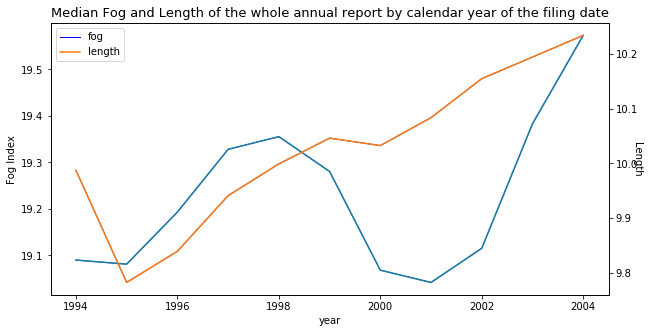

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig1_A = data.groupby("year")["fog","length"].median()
fig, ax1 = plt.subplots(figsize=(10,5))
fig1_A.fog.plot(ax=ax1, color='g', linewidth=1.0)
fig1_A.length.plot(secondary_y=True, ax=ax1, color='b', linewidth=1.0)
ax = fig1_A.fog.plot(); 
ax.set_ylabel('Fog Index', fontsize=10);
fig1_A.length.plot(ax=ax, secondary_y=True);

plt.xlabel('year', fontsize=15)
plt.title('Median Fog and Length of the whole annual report by calendar year of the filing date',
         fontsize=13)
plt.ylabel('Length', fontsize=10,rotation=-90)
plt.legend(["fog","length"])
plt.show()

# Part 3: Determinants of Readability

## Part 3.1: Summary statistics for regression (Table 2 panel A)

In [25]:
t2a = data[["age",'spi','ret_vol',"earn_vol","nbseg",'ngseg','nitems','seo','ma','dlw']]
t2a.columns =[i.upper() for i in ["age",'si','ret_vol',"earn_vol","nbseg",'ngseg','nitems','seo','ma','dlw']]
t2a = t2a.describe(percentiles=[0.01,0.25,0.50,0.75,0.99]).T
t2a.rename(columns={"count":"N","50%":"median","75%":"75th","25%":"25th","std":"std.dev.","1%":"1st","99%":"99th"}, inplace=True)
t2a=t2a[['mean', 'median','std.dev.', '1st', '25th',  '75th', '99th','N']]
t2a = t2a.T
t2a.AGE = [f'{x:.2f}' for x in t2a.AGE]
t2a.SI = [f'{x:.2f}' for x in t2a.SI]
t2a.RET_VOL = [f'{x:.2f}' for x in t2a.RET_VOL]
t2a.EARN_VOL = [f'{x:.2f}' for x in t2a.EARN_VOL]
t2a.NBSEG = [f'{x:.2f}' for x in t2a.NBSEG]
t2a.NGSEG = [f'{x:.2f}' for x in t2a.NGSEG]
t2a.NITEMS = [f'{x:.2f}' for x in t2a.NITEMS]
t2a.SEO = [f'{x:.2f}' for x in t2a.SEO]
t2a.MA = [f'{x:.2f}' for x in t2a.MA]
t2a.DLW = [f'{x:.2f}' for x in t2a.DLW]
t2a = t2a.T
t2a["N"] = [f'{float(x):.0f}' for x in t2a["N"]]
for j in range(7,10):
    for i in range(1,7):
        t2a.iloc[j,i] = "-"

t2a = t2a.style.set_properties(**{'text-align': 'left'})
t2a.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
t2a
## Note that I use comp.company incorp column as a criteria for determining whether the firm is incorporated in Delaware
# which may be different from Li, 2008

,mean,median,std.dev.,1st,25th,75th,99th,N
AGE,13.65,8.76,14.40,0.01,3.76,19.10,71.97,46779
SI,-19.67,0.00,332.63,-465.78,-2.39,0.00,61.65,46023
RET_VOL,0.15,0.12,0.11,0.03,0.08,0.19,0.57,44073
EARN_VOL,0.08,0.04,0.22,0.00,0.02,0.08,0.67,41472
NBSEG,1.88,1.00,1.39,1.00,1.00,3.00,6.00,41300
NGSEG,2.26,2.00,1.35,1.00,1.00,3.00,7.00,38045
NITEMS,262.39,266.00,41.94,136.00,251.00,289.00,330.00,46779
SEO,0.15,-,-,-,-,-,-,46779
MA,0.09,-,-,-,-,-,-,46779
DLW,0.57,-,-,-,-,-,-,45882


## Part 3.2: Determinants of readability regression (Table 2 panel B)

In [26]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic_comp"]//100]
data["indus"] = [i for i in data["sic"]//100]

## also year effects is the file year rather than then the fyear, keep in mind. 
# It makes more sense

# determinants of fog
data_temp = data[["fog",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# cluster at 2-digit sic, industry and year FE
determine_fog = "FOG~1+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
fog_ols = ols(determine_fog, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# # determinants of length
data_temp = data[["length",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# cluster at 2-digit sic, industry and year FE
determine_length = "LENGTH~1+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
length_ols = ols(determine_length, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})



# get neat table for displaying results
stargazer = Stargazer([fog_ols, length_ols])
stargazer.custom_columns(['fog (whole reoport)','length (whole reoport)'], [1,1])
stargazer.covariate_order(['SIZE', 'MTB', 'AGE', 'SI', 'RET_VOL', 'EARN_VOL',\
                           'NBSEG', 'NGSEG', 'NITEMS', 'SEO','MA','DLW'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes'])
stargazer.show_model_numbers(False)
# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T2BC.html', 'w') as f:
    f.write(html)
a
# stargazer.add.lines = list(c("Fixed effects?", "No", "No")]
# uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [27]:
# dir(Stargazer)
# Stargazer.lt

# Part 4: Current earnings and annual report readability
## Part 4.1  Table 3, Panal A Level specification

In [28]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [f"{i:.0f}" for i in data["sic"]//100]
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



#======================================= fog_earns ============================================== 
data_temp = data[["fog","earn",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ["fog","earnings",'size','mtb','age','si','ret_vol',\
                     "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
fog_earns = "FOG~1+EARNINGS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
fog_earns = ols(fog_earns, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})



#===================================== length_earns=====================================
data_temp = data[["length","earn",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ["length","earnings",'size','mtb','age','si','ret_vol',\
                     "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
length_earns = "LENGTH~1+EARNINGS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
length_earns = ols(length_earns, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




#===================================== fog_profitdummy=====================================
data_temp = data[["fog","profit_or_loss",'size','mtb','age','si','ret_vol',\
                   "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
fog_profitdummy = "FOG~1+PROFIT_OR_LOSS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
fog_profitdummy = ols(fog_profitdummy, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




#===================================== length_profitdummy=====================================
data_temp = data[["length","profit_or_loss",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# cluster at 2-digit sic, industry and year FE
length_profitdummy = "LENGTH~1+PROFIT_OR_LOSS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
length_profitdummy = ols(length_profitdummy, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




# #================== get neat table for displaying results=====================================
stargazer = Stargazer([fog_earns, fog_profitdummy, length_earns, length_profitdummy])
stargazer.custom_columns(['fog','fog','length','length'], [1,1,1,1])
stargazer.covariate_order(['EARNINGS','PROFIT_OR_LOSS'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes','Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes','Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes','Yes','Yes'])
# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T3A.html', 'w') as f:
    f.write(html)
a
# uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [29]:
# data.head()
# dir(stargazer)

In [30]:
# data.columns

## Part 4.2 Table 3, Panal B change specification

In [31]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



#======================================= fog_earns ============================================== 
data_temp = data[["change_fog","change_earnings",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
fog_earns = "CHANGE_FOG~1+CHANGE_EARNINGS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
fog_earns = ols(fog_earns, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})



#===================================== length_earns=====================================
data_temp = data[["change_length","change_earnings",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
length_earns = "CHANGE_LENGTH~1+CHANGE_EARNINGS+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
length_earns = ols(length_earns, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




#===================================== fog_earnings_pos_neg_dummy=====================================
data_temp = data[["change_fog","earnings_pos_neg_dummy",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # cluster at 2-digit sic, industry and year FE
fog_profitdummy = "CHANGE_FOG~1+EARNINGS_POS_NEG_DUMMY+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
fog_profitdummy = ols(fog_profitdummy, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




#===================================== length_earnings_pos_neg_dummy=====================================
data_temp = data[["change_length","earnings_pos_neg_dummy",'size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# cluster at 2-digit sic, industry and year FE
length_profitdummy = "CHANGE_LENGTH~1+EARNINGS_POS_NEG_DUMMY+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA+DLW+C(INDUS)+C(YEAR)"
length_profitdummy = ols(length_profitdummy, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})




# #================== get neat table for displaying results=====================================
stargazer = Stargazer([fog_earns, fog_profitdummy, length_earns, length_profitdummy])
stargazer.custom_columns(['change_fog','change_fog','change_length','change_length'], [1,1,1,1])
stargazer.covariate_order(['CHANGE_EARNINGS','EARNINGS_POS_NEG_DUMMY'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes','Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes','Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes','Yes','Yes'])

# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T3B.html', 'w') as f:
    f.write(html)
a
# uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\WuYiyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

# Part 5: Earnings Persistence and Readability
## Part 5.1  earnings persistence and annual report Fog index, profit firm-years (Table 4 Panel A)

In [32]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



# #======================================= fog_1 ============================================== 
data_temp = data[data["profit_or_loss"]==1][['earn1', "fog","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_1yr', "fog","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_1yr"]>=-1) & (data_temp["earn_in_1yr"] <=1))]

data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
fog_1 = '''EARN_IN_1YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

fog_1 = ols(fog_1, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# #===================================== fog_2=======================================

data_temp = data[data["profit_or_loss"]==1][['earn2', "fog","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_2yr', "fog","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_2yr"]>=-1) & (data_temp["earn_in_2yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
fog_2 = '''EARN_IN_2YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

fog_2 = ols(fog_2, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})



# # #================== get neat table for displaying results=====================================
stargazer = Stargazer([fog_1, fog_2])
stargazer.custom_columns(['earn (t+1)','earn (t+2)'], [1,1])
stargazer.covariate_order(['EARNINGS','FOG','EARNINGS:FOG'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes'])
# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T4A.html', 'w') as f:
    f.write(html)
a
# # uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)


## Part 5.2  earnings persistence and annual report length, profit firm-years (Table 4 Panel B)

In [33]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



# #=====================================length_1=====================================
data_temp = data[data["profit_or_loss"]==1][['earn1', "length","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_1yr', "length","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_1yr"]>=-1) & (data_temp["earn_in_1yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
length_1 = '''EARN_IN_1YR~1+EARNINGS+LENGTH+EARNINGS*LENGTH
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

length_1 = ols(length_1, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# #===================================== length_2=====================================

data_temp = data[data["profit_or_loss"]==1][['earn2', "length","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_2yr', "length","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_2yr"]>=-1) & (data_temp["earn_in_2yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
length_2 = '''EARN_IN_2YR~1+EARNINGS+LENGTH+EARNINGS*LENGTH
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''



length_2 = ols(length_2, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# # #================== get neat table for displaying results=====================================
stargazer = Stargazer([length_1, length_2])
stargazer.custom_columns(['earn (t+1)','earn (t+2)'], [1,1])
stargazer.covariate_order(['EARNINGS','LENGTH','EARNINGS:LENGTH'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes'])

# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T4B.html', 'w') as f:
    f.write(html)
a
# # uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 109, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)


## Part 5.3  earnings persistence and annual report fog, loss firm-years (Table 5 Panel A)

In [34]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



# #======================================= fog_1 ============================================== 
data_temp = data[data["profit_or_loss"]==0][['earn1', "fog","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_1yr', "fog","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_1yr"]>=-1) & (data_temp["earn_in_1yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
fog_1 = '''EARN_IN_1YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

'''EARN_IN_1YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+DLW+C(INDUS)+C(YEAR)'''

fog_1 = ols(fog_1, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# #===================================== fog_2=======================================

data_temp = data[data["profit_or_loss"]==0][['earn2', "fog","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_2yr', "fog","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_2yr"]>=-1) & (data_temp["earn_in_2yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
fog_2 = '''EARN_IN_2YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

'''EARN_IN_2YR~1+EARNINGS+FOG+EARNINGS*FOG
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+DLW+C(INDUS)+C(YEAR)'''

fog_2 = ols(fog_2, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})



# # #================== get neat table for displaying results=====================================
stargazer = Stargazer([fog_1, fog_2])
stargazer.custom_columns(['earn (t+1)','earn (t+2)'], [1,1])
stargazer.covariate_order(['EARNINGS','FOG','EARNINGS:FOG'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes'])
# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T5A.html', 'w') as f:
    f.write(html)
a
# # uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 107, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 107, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)


## Part 5.4  earnings persistence and annual report length, loss firm-years (Table 5 Panel B)

In [35]:
from statsmodels.formula.api import ols
import pandas as pd
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## preapare 2-digit SIC industry fixed effects
data["indus"] = [i for i in data["sic"]//100]
## also year effects is the file year rather than then the fyear!! keep in mind. 
# It makes more sense



# #=====================================length_1=====================================
data_temp = data[data["profit_or_loss"]==0][['earn1', "length","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_1yr', "length","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_1yr"]>=-1) & (data_temp["earn_in_1yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
length_1 = '''EARN_IN_1YR~1+EARNINGS+LENGTH+EARNINGS*LENGTH
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

length_1 = ols(length_1, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# #===================================== length_2=====================================

data_temp = data[data["profit_or_loss"]==0][['earn2', "length","earn",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']]
data_temp.columns = ['earn_in_2yr', "length","earnings",'absacc', 'div','size','mtb','age','si','ret_vol',\
                  "earn_vol","nbseg",'ngseg',"nitems",'seo','ma',"dlw","indus",'year']
data_temp["nbseg"] = np.log(1+data_temp["nbseg"])
data_temp["ngseg"] = np.log(1+data_temp["ngseg"])
data_temp["nitems"] = np.log(1+data_temp["nitems"])
data_temp = data_temp[((data_temp["earn_in_2yr"]>=-1) & (data_temp["earn_in_2yr"] <=1))]
data_temp = data_temp.dropna()
data_temp.columns = [i.upper() for i in data_temp.columns]

# # # cluster at 2-digit sic, industry and year FE
length_2 = '''EARN_IN_2YR~1+EARNINGS+LENGTH+EARNINGS*LENGTH
+ABSACC+DIV+SIZE+MTB+AGE+SI+RET_VOL+EARN_VOL+NBSEG+NGSEG+NITEMS+SEO+MA
+EARNINGS*ABSACC+EARNINGS*DIV+EARNINGS*SIZE+EARNINGS*MTB+EARNINGS*AGE+EARNINGS*SI
+EARNINGS*RET_VOL+EARNINGS*EARN_VOL+EARNINGS*NBSEG+EARNINGS*NGSEG+EARNINGS*NITEMS+EARNINGS*DLW+EARNINGS*SEO+EARNINGS*MA
+DLW+C(INDUS)+C(YEAR)'''

length_2 = ols(length_2, data=data_temp).fit(cov_type='cluster',
                                                 cov_kwds={'groups':data_temp['INDUS']})


# # #================== get neat table for displaying results=====================================
stargazer = Stargazer([length_1, length_2])
stargazer.custom_columns(['earn (t+1)','earn (t+2)'], [1,1])
stargazer.covariate_order(['EARNINGS','LENGTH','EARNINGS:LENGTH'])
stargazer.add_custom_notes(['standard error clustered at the 2-digit sic industry level'])

stargazer.add_line('Year Dummies', ['Yes','Yes'])
stargazer.add_line('Industry Dummies', ['Yes','Yes'])
stargazer.add_line('Controls', ['Yes','Yes'])
# export to html file
a = HTML(stargazer.render_html())
html = a.data
with open('T5B.html', 'w') as f:
    f.write(html)
a
# # uncomment a to see the regression results in this notebook

C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 107, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\WuYiyang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 107, but rank is 41
  'rank is %d' % (J, J_), ValueWarning)
